<a href="https://colab.research.google.com/github/itimes-digital/deep-learning-estudo/blob/main/digitos_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense

In [3]:
(previsores_treinamento, _), (previsores_teste, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
previsores_treinamento.shape, previsores_teste.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
previsores_treinamento = previsores_treinamento.astype('float32') / 255
previsores_teste = previsores_teste.astype('float') / 255

In [6]:
previsores_treinamento = previsores_treinamento.reshape((len(previsores_treinamento),
                                                         np.prod(previsores_treinamento.shape[1:])))
previsores_treinamento.shape

(60000, 784)

In [7]:
previsores_teste = previsores_teste.reshape(len(previsores_teste),
                                            np.prod(previsores_teste.shape[1:]))
previsores_teste.shape

(10000, 784)

# Criação do modelo AUTOENCODER

Neurônios do modelo: 784 -> 32 -> 784


In [8]:
fator_compactacao = 784 / 32
fator_compactacao

24.5

In [9]:
model = Sequential()

# Camada de entrada -> 784, Camada escondida -> 32
model.add(Dense(units = 32, activation = 'relu', input_dim = 784))

# Camada de saída
model.add(Dense(units = 784, activation = 'sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# compara a entrada com a própria previsão da entrada
history = model.fit(previsores_treinamento, 
                    previsores_treinamento,
                    epochs = 50,
                    batch_size = 256,
                    validation_data = (previsores_teste, previsores_teste));

# Para modelos de autoencoder o ideal é processar com muitas épocas, assim se obtêm uma acurácia melhor.

In [ ]:
history.history

In [15]:
np.mean(history.history['val_loss']), np.mean(history.history['val_accuracy']), np.mean(history.history['loss']), np.mean(history.history['accuracy'])

(0.09814181327819824,
 0.012737999986857176,
 0.1019219209253788,
 0.01168633334338665)

In [18]:
dimensao_original = Input(shape=(784,))

In [19]:
camada_encoder = model.layers[0]

In [20]:
encoder = Model(dimensao_original, camada_encoder(dimensao_original))

In [21]:
encoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [22]:
imagens_codificadas = encoder.predict(previsores_teste)
imagens_codificadas.shape

(10000, 32)

In [24]:
imagens_decodificadas = model.predict(previsores_teste)
imagens_decodificadas.shape

(10000, 784)

# Exibição de imagens originais, imagens codificadas e imagens decodificadas. 

# É possível melhorar a visualização das imagens decodificadas, caso reprocesse o modelo com mais épocas, assim a diferença de erro será menor.

In [38]:
numero_imagens = 10
imagens_teste = np.random.randint(previsores_teste.shape[0], size = numero_imagens);

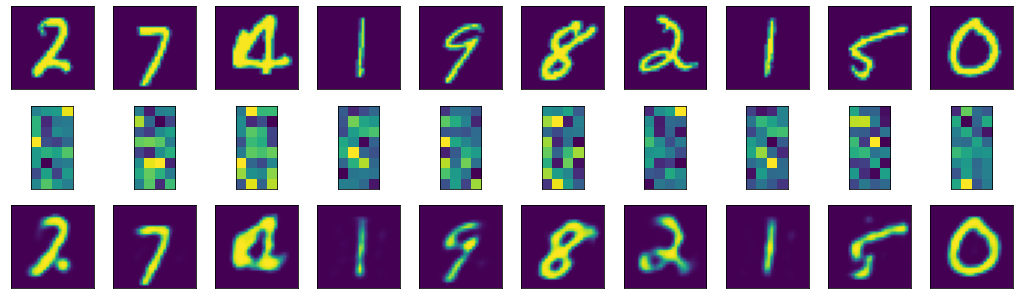

In [39]:
plt.figure(figsize = (18,18))

for i, indice_imagem in enumerate(imagens_teste):
  
  # Imagens originais
  eixo = plt.subplot(10,10, i + 1)
  plt.imshow(previsores_teste[indice_imagem].reshape(28,28))
  plt.xticks(())
  plt.yticks(())

  # Imagens codificadas
  eixo = plt.subplot(10,10, i + 1 + numero_imagens)
  plt.imshow(imagens_codificadas[indice_imagem].reshape(8,4))
  plt.xticks(())
  plt.yticks(())

  # Imagens reconstruída
  eixo = plt.subplot(10,10, i + 1 + numero_imagens * 2)
  plt.imshow(imagens_decodificadas[indice_imagem].reshape(28,28))
  plt.xticks(())
  plt.yticks(())

plt.show()